In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns

from solution_guidance.cslib import fetch_data, convert_to_ts



## Import Data

In [2]:
def return_all_data(path):
    files_list = [path + '/' + fname for fname in os.listdir(path)]
    
    list_frame = []
    
    for f in files_list:
        df_temp = pd.read_json(f)
        
        cols = set(df_temp.columns.tolist())
        
        if 'StreamID' in cols:
            df_temp.rename(columns={'StreamID':'stream_id'},inplace=True)
        if 'TimesViewed' in cols:
            df_temp.rename(columns={'TimesViewed':'times_viewed'},inplace=True)
        if 'total_price' in cols:
            df_temp.rename(columns={'total_price':'price'},inplace=True)
            
        list_frame.append(df_temp)
        
        
    df = pd.concat(list_frame)
    
    years, months, days = df['year'].values,df['month'].values,df['day'].values 
    dates = ["{}-{}-{}".format(years[i],str(months[i]).zfill(2),str(days[i]).zfill(2)) for i in range(df.shape[0])]
    df['invoice_date'] = np.array(dates,dtype='datetime64[D]')
    
    return df

df = return_all_data('cs-train')

In [3]:
df

,country,customer_id,invoice,price,stream_id,times_viewed,year,month,day,invoice_date
0,United Kingdom,13085.0,489434,6.95,85048,12,2017,11,28,2017-11-28
1,United Kingdom,NaN,489597,8.65,22130,1,2017,11,28,2017-11-28
2,United Kingdom,NaN,489597,1.70,22132,6,2017,11,28,2017-11-28
3,United Kingdom,NaN,489597,1.70,22133,4,2017,11,28,2017-11-28
4,United Kingdom,NaN,489597,0.87,22134,1,2017,11,28,2017-11-28
...,...,...,...,...,...,...,...,...,...,...
42013,United Kingdom,15628.0,562163,0.85,21544,12,2019,7,31,2019-07-31
42014,United Kingdom,15628.0,562163,1.95,47591D,8,2019,7,31,2019-07-31
42015,United Kingdom,15628.0,562163,0.83,23167,12,2019,7,31,2019-07-31
42016,United Kingdom,15628.0,562163,4.95,22138,3,2019,7,31,2019-07-31


In [4]:
df.columns

Index(['country', 'customer_id', 'invoice', 'price', 'stream_id',
       'times_viewed', 'year', 'month', 'day', 'invoice_date'],
      dtype='object')

In [19]:
df['country'].unique()

array(['United Kingdom', 'Portugal', 'Germany', 'EIRE', 'France', 'USA',
       'Australia', 'Belgium', 'Netherlands', 'Nigeria', 'Japan',
       'Denmark', 'Poland', 'Spain', 'Italy', 'Channel Islands', 'Cyprus',
       'Norway', 'Greece', 'Austria', 'Sweden', 'United Arab Emirates',
       'Finland', 'Switzerland', 'Unspecified', 'Malta', 'Bahrain', 'RSA',
       'Bermuda', 'Hong Kong', 'Singapore', 'Thailand', 'Israel',
       'Lithuania', 'West Indies', 'Lebanon', 'Korea', 'Brazil', 'Canada',
       'Iceland', 'Saudi Arabia', 'Czech Republic', 'European Community'],
      dtype=object)

In [5]:
df.head(1)

,country,customer_id,invoice,price,stream_id,times_viewed,year,month,day,invoice_date
0,United Kingdom,13085.0,489434,6.95,85048,12,2017,11,28,2017-11-28


In [6]:
print('CustomerID has empty value.')

CustomerID has empty value.


In [7]:
df['invoice'].value_counts()

537434     1350
538071     1304
537638     1202
537237     1194
536876     1186
           ... 
529142        1
506105        1
C562041       1
C554373       1
527333        1
Name: invoice, Length: 42646, dtype: int64

In [8]:
df_grouped_by_country = df[df['country'] == 'United Kingdom'].groupby(['stream_id']).sum()[['times_viewed', 'price']]
#pltdf_grouped_by_country
df_grouped_by_country

,times_viewed,price
stream_id,,
10002,2217,337.52
10002R,4,15.40
10080,113,8.68
10109,5,0.42
10120,338,14.80
...,...,...
gift_0001_60,13,0.00
gift_0001_70,13,59.57
gift_0001_80,13,139.12


Max Value PRICE: 526081.8100000002
Max Value Times Viewed: 526081.8100000002


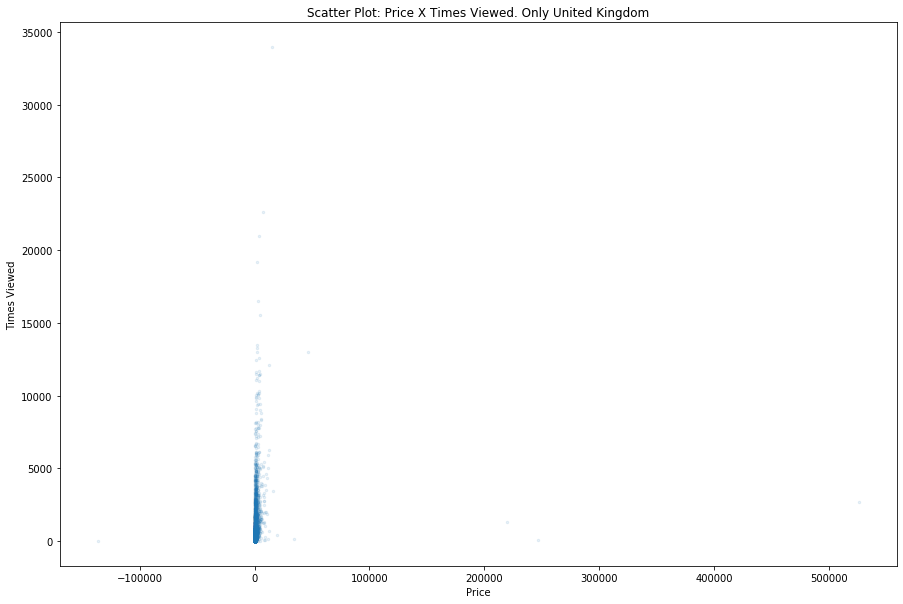

In [9]:
plt.figure(figsize=(15,10))
plt.title('Scatter Plot: Price X Times Viewed. Only United Kingdom')

plt.scatter(df_grouped_by_country['price'], df_grouped_by_country['times_viewed'], s=6, alpha=0.1)
plt.xlabel('Price')
plt.ylabel('Times Viewed')
print('Max Value PRICE: {}'.format(df_grouped_by_country['price'].max()))
print('Max Value Times Viewed: {}'.format(df_grouped_by_country['price'].max()))

In [10]:
new_df = df_grouped_by_country[df_grouped_by_country['price'] < 10000]
new_df = new_df[new_df['price'] > 0]

Max Value PRICE: 9837.450000000019
Max Value Times Viewed: 9837.450000000019


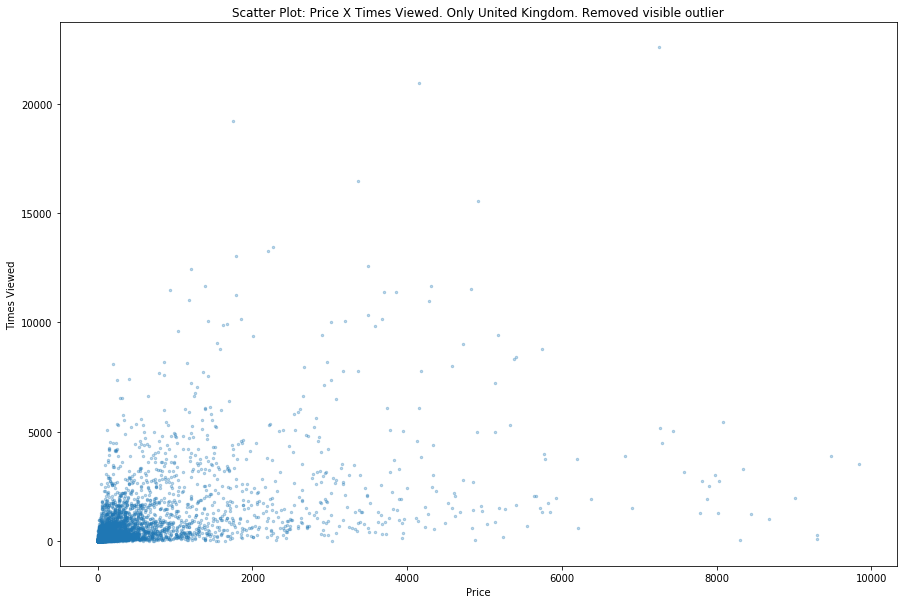

In [11]:
plt.figure(figsize=(15,10))
plt.title('Scatter Plot: Price X Times Viewed. Only United Kingdom. Removed visible outlier')

plt.scatter(new_df['price'], new_df['times_viewed'], s=6, alpha=0.3)
plt.xlabel('Price')
plt.ylabel('Times Viewed')
plt.plot()
print('Max Value PRICE: {}'.format(new_df['price'].max()))
print('Max Value Times Viewed: {}'.format(new_df['price'].max()))

In [13]:
from sklearn.cluster import KMeans
X = new_df.values

kmeans = KMeans(n_clusters=7)

kmeans.fit_predict(X)
new_df['cluster'] = kmeans.fit_predict(X)
new_df['cluster'].unique()

array([0, 3, 4, 2, 5, 1, 6])

[]

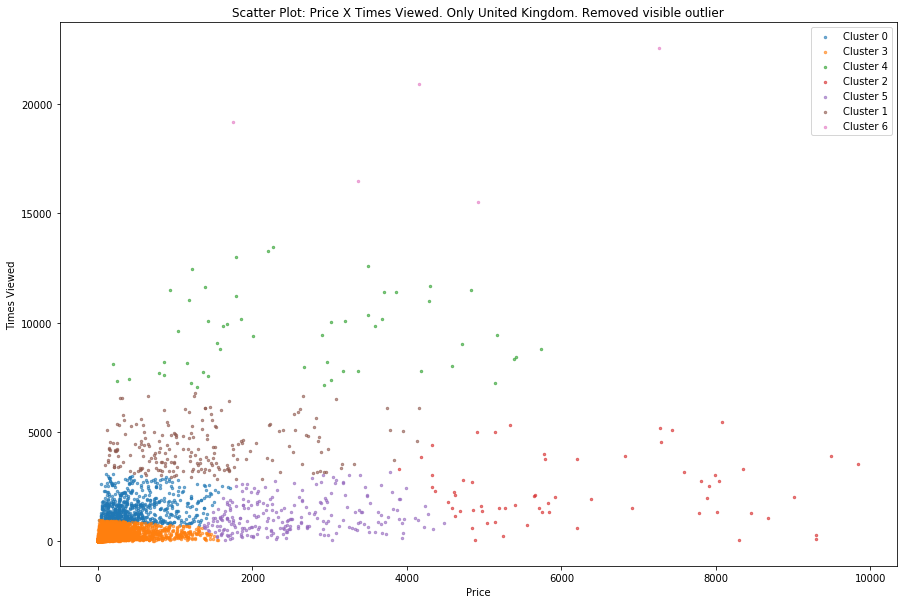

In [14]:
plt.figure(figsize=(15,10))
plt.title('Scatter Plot: Price X Times Viewed. Only United Kingdom. Removed visible outlier')

for i in new_df['cluster'].unique():
    plt.scatter(new_df[new_df['cluster'] == i]['price'], new_df[new_df['cluster'] == i]['times_viewed'], s=6, alpha=0.6, label='Cluster {}'.format(i))


plt.xlabel('Price')
plt.ylabel('Times Viewed')
plt.legend()
plt.plot()

## Part 2

In [20]:
from statsmodels.tsa.seasonal import seasonal_decompose

def create_ts_by_df(ds, ):
    print(ds.country.unique())
    start_month = '{}-{}'.format(ds['year'].values[0],str(ds['month'].values[0]).zfill(2))
    stop_month = '{}-{}'.format(ds['year'].values[-1],str(ds['month'].values[-1]).zfill(2))
    all_days_ts = np.arange(start_month, stop_month, dtype='datetime64[D]')
    dates = df['invoice_date'].values.astype('datetime64[D]')
    
    list_ts = []
    
    for day in all_days_ts:
        count_purchases = np.where(dates==day)[0].size
        count_invoices_diff = np.unique(ds[dates==day]['invoice'].values).size
        count_streams_diff = np.unique(ds[dates==day]['stream_id'].values).size
        sum_views =  ds[dates==day]['times_viewed'].values.sum()
        sum_price_revenue = ds[dates==day]['price'].values.sum()
        
        obj_monted = {
                        'date': day,
                        'total_invoice': count_invoices_diff,
                        'purchase': count_purchases,
                        'total_streams': count_streams_diff,
                        'total_views': sum_views,
                        'revenue': sum_price_revenue
                     }
        
        list_ts.append(obj_monted)
        
    
    return pd.DataFrame(data=list_ts)

def plot_df(x, y, title="", xlabel='Date', ylabel='Value', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:red', linewidth=1)
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

def plot_decomposed_timeserie(ts, freq = 12, title=''):
    
    fig, axs = plt.subplots(4,1,figsize=(15,15))
    fig.suptitle(title)
    
    
    decomposed = seasonal_decompose(ts, freq = freq)
    
    trend = decomposed.trend
    seasonal = decomposed.seasonal
    random = decomposed.resid
    
    
    axs[0].set_title('Original')
    axs[0].plot(ts,label='Original')
    
    axs[1].set_title('Trend')
    axs[1].plot(trend, label= 'Trend')
    
    axs[2].set_title('Seasonality')
    axs[2].plot(seasonal, label='Seasonality')
    
    axs[3].set_title('Random')
    axs[3].plot(random, label='Random')
    
    plt.tight_layout()
    plt.show()
    


In [21]:
ts_uk = create_ts_by_df(df)

['United Kingdom' 'Portugal' 'Germany' 'EIRE' 'France' 'USA' 'Australia'
 'Belgium' 'Netherlands' 'Nigeria' 'Japan' 'Denmark' 'Poland' 'Spain'
 'Italy' 'Channel Islands' 'Cyprus' 'Norway' 'Greece' 'Austria' 'Sweden'
 'United Arab Emirates' 'Finland' 'Switzerland' 'Unspecified' 'Malta'
 'Bahrain' 'RSA' 'Bermuda' 'Hong Kong' 'Singapore' 'Thailand' 'Israel'
 'Lithuania' 'West Indies' 'Lebanon' 'Korea' 'Brazil' 'Canada' 'Iceland'
 'Saudi Arabia' 'Czech Republic' 'European Community']


**It was setted Revenue as target**

In [23]:
#print(ts_uk['country'])
#plot_df(ts_uk['date'],ts_uk['revenue'], 'Revenue Arround Time','Date', 'Revenue')
ts_uk

,date,total_invoice,purchase,total_streams,total_views,revenue
0,2017-11-01,0,0,0,0,0.00
1,2017-11-02,0,0,0,0,0.00
2,2017-11-03,0,0,0,0,0.00
3,2017-11-04,0,0,0,0,0.00
4,2017-11-05,0,0,0,0,0.00
...,...,...,...,...,...,...
602,2019-06-26,67,1358,999,6420,4903.17
603,2019-06-27,80,1620,944,9435,5499.38
604,2019-06-28,70,1027,607,5539,3570.60
605,2019-06-29,0,0,0,0,0.00


**Time Series Analysis**

C:\tools\Anaconda3\lib\site-packages\ipykernel_launcher.py:45: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead


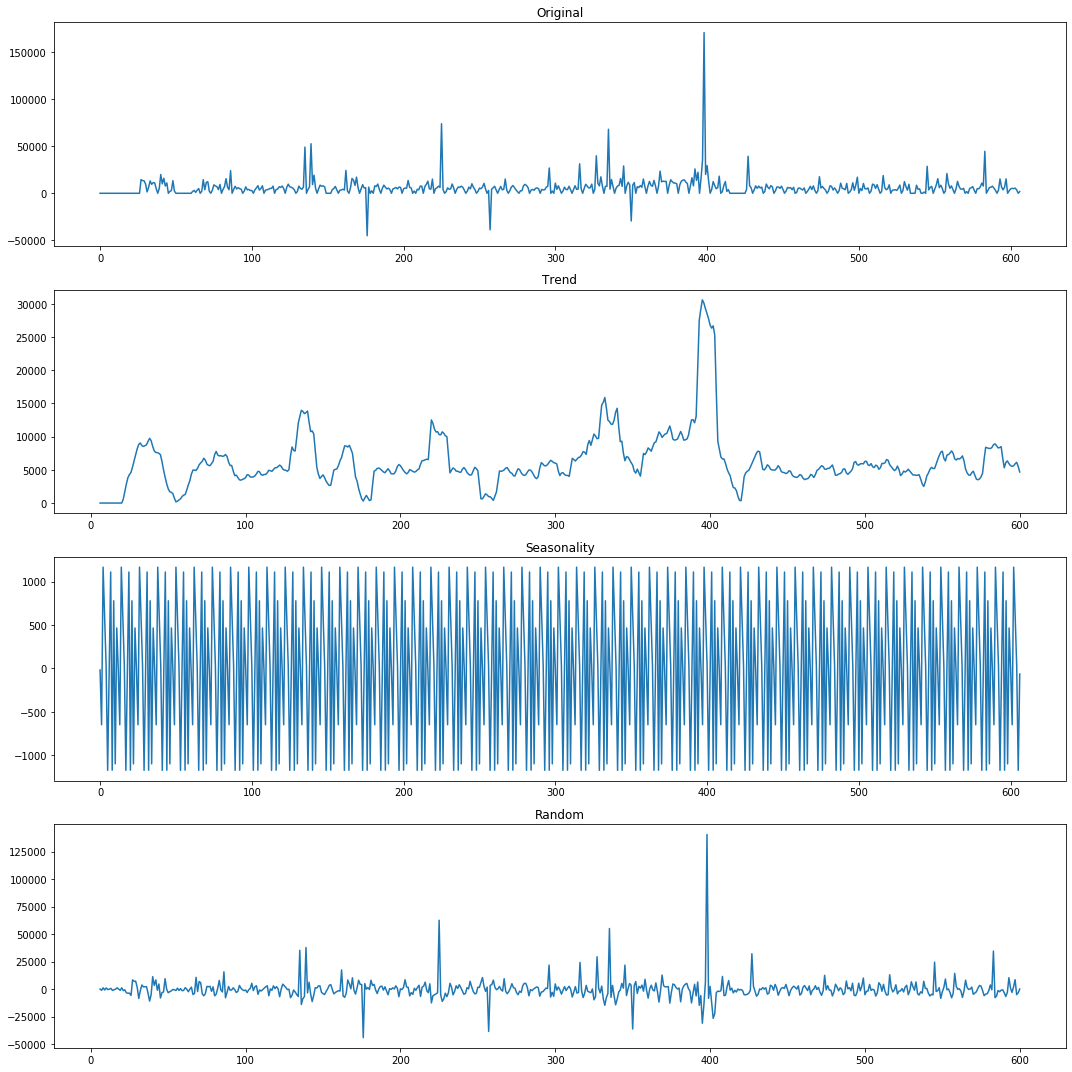

The revenue serie has strong trend, but there is no seasonality


In [18]:
plot_decomposed_timeserie(ts_uk['revenue'])
print('The revenue serie has strong trend, but there is no seasonality')

### Create Model
- LSTM

In [146]:
from keras.models import Sequential, Model
from keras.layers import LSTM, Input, Activation, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
from keras.preprocessing.sequence import TimeseriesGenerator
from statsmodels.tools.eval_measures import rmse, mse, meanabs

def get_y_from_generator(gen):
    '''
    Get all targets y from a TimeseriesGenerator instance.
    '''
    y = None
    for i in range(len(gen)):
        batch_y = gen[i][1]
        if y is None:
            y = batch_y
        else:
            y = np.append(y, batch_y)
    y = y.reshape((-1,1))
    print(y.shape)
    return y


# input_shape=x_train.shape[-2:]

def create_model_learning(input_shape):
    
    input = Input(input_shape)

    x = LSTM(512, return_sequences=True)(input)
    x = Activation('relu')(x)
    
    x = LSTM(256, return_sequences=False)(x)
    x = Activation('relu')(x)
    
    x = Dropout(0.2)(x)
    x = Dense(50)(x)
    x = Activation('relu')(x)
    
    x = Dropout(0.1)(x)
    x = Dense(1, name='output')(x)

    model = Model(inputs = input, outputs = x, name='TimeSerieModel')
    return model



In [135]:
ds = ts_uk[['revenue']]

len_train = int(ds.shape[0] * 0.8) 
train = ds.iloc[:len_train]
test = ds.iloc[len_train:]

In [136]:
scaler = MinMaxScaler()
scaler.fit(train)
train = scaler.transform(train)
test = scaler.transform(test)

In [139]:
train_generator = TimeseriesGenerator(train, train, length=12, batch_size=6)
model = create_model_learning((12, 1))
model.compile(optimizer='adam', loss='mse')



In [140]:
model.fit_generator(train_generator, epochs=70, verbose=1)

Epoch 1/70
79/79 [==============================] - 8s 102ms/step - loss: 0.0070
Epoch 2/70
79/79 [==============================] - 7s 90ms/step - loss: 0.0034
Epoch 3/70
79/79 [==============================] - 8s 96ms/step - loss: 0.0034
Epoch 4/70
79/79 [==============================] - 8s 106ms/step - loss: 0.0036
Epoch 5/70
79/79 [==============================] - 9s 111ms/step - loss: 0.0035
Epoch 6/70
79/79 [==============================] - 8s 106ms/step - loss: 0.0032
Epoch 7/70
79/79 [==============================] - 8s 105ms/step - loss: 0.0031
Epoch 8/70
79/79 [==============================] - 8s 107ms/step - loss: 0.0032
Epoch 9/70
79/79 [==============================] - 8s 107ms/step - loss: 0.0030
Epoch 10/70
79/79 [==============================] - 9s 108ms/step - loss: 0.0030
Epoch 11/70
79/79 [==============================] - 8s 102ms/step - loss: 0.0032
Epoch 12/70
79/79 [==============================] - 8s 101ms/step - loss: 0.0031
Epoch 13/70
79/79 [========

In [141]:
pred_list = []

batch = train[-12:].reshape((1, 12, 1))

for i in range(test.shape[0]):   
    pred_list.append(model.predict(batch)[0]) 
    batch = np.append(batch[:,1:,:],[[pred_list[i]]],axis=1)
    
pred_list = np.asarray(pred_list)

In [142]:
df_predict = pd.DataFrame(scaler.inverse_transform(pred_list),
                          index=ds[-len(pred_list):].index, columns=['Prediction'])

df_test = pd.concat([ds,df_predict], axis=1)

In [133]:
df_test

,revenue,Prediction
0,0.00,NaN
1,0.00,NaN
2,0.00,NaN
3,0.00,NaN
4,0.00,NaN
...,...,...
602,4903.17,6704.539551
603,5499.38,6704.539551
604,3570.60,6704.539551
605,0.00,6704.539551


No handles with labels found to put in legend.


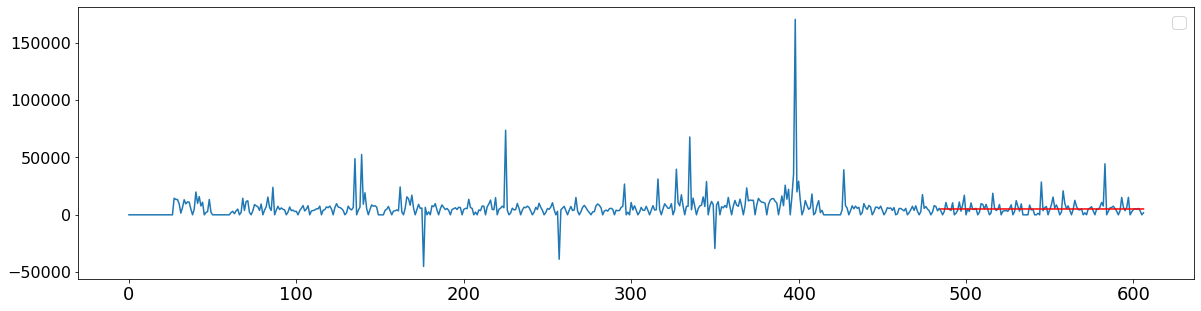

In [144]:

plt.figure(figsize=(20, 5))
plt.plot(df_test.index, df_test['revenue'])
plt.plot(df_test.index, df_test['Prediction'], color='r')
plt.legend(loc='best', fontsize='xx-large')
plt.xticks(fontsize=18)
plt.yticks(fontsize=16)
plt.show()

In [148]:
def MAPE(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

y_test = df_test.iloc[-test.shape[0]:, [0]]
y_predicted = df_test.iloc[-test.shape[0]:, [1]]

pred_actual_rmse = rmse(y_test, y_predicted)
pred_actual_mse = mse(y_test, y_predicted)
pred_actual_mae = meanabs(y_test, y_predicted)
pred_actual_mape = MAPE(y_test.values, y_predicted.values)


print("RMSE: %f" % pred_actual_rmse)
print("MSE: %f" % pred_actual_mse)
print("MAE: %f" % pred_actual_mae)
print("MAPE: %f" % pred_actual_mape)


RMSE: 5914.164270
MSE: 34977339.013698
MAE: 3622.119958
MAPE: inf


C:\tools\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  
